In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [3]:
tc_train = pd.read_csv(r'https://drive.google.com/uc?export=download&id=1IM7t-4Ik738CyNeSibpO0qiV8P0PEsYl')

In [4]:
tc_train.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


**Data wrangling**

Text(0.5, 1.0, 'Missing values heatmap')

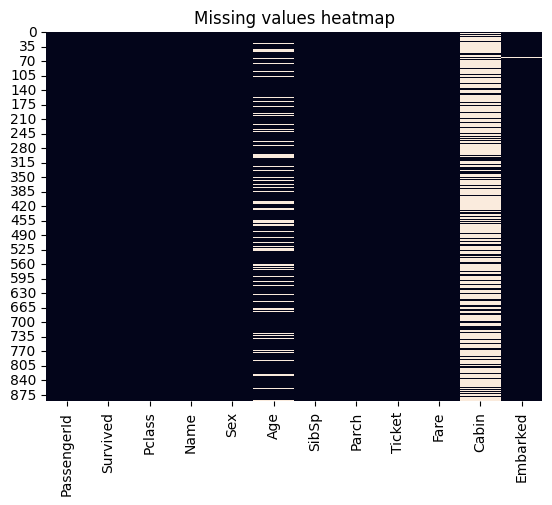

In [5]:
sns.heatmap(tc_train.isnull(), cbar=False).set_title("Missing values heatmap")

In [6]:
tc_description = pd.DataFrame({'null': tc_train.isnull().sum(),
                                'nunique': tc_train.nunique(),
                                'dtypes': tc_train.dtypes,
                                'example': tc_train.T[0]})

tc_description

,null,nunique,dtypes,example
PassengerId,0,891,int64,1
Survived,0,2,int64,0
Pclass,0,3,int64,3
Name,0,891,object,"Braund, Mr. Owen Harris"
Sex,0,2,object,male
Age,177,88,float64,22.0
SibSp,0,7,int64,1
Parch,0,7,int64,0
Ticket,0,681,object,A/5 21171
Fare,0,248,float64,7.25


**Descriptive analysis**

In [7]:
tc_train.groupby('Survived')['PassengerId'].count()

Survived
0    549
1    342
Name: PassengerId, dtype: int64

In [8]:
tc_pclass = tc_train.groupby(['Pclass', 'Survived'])['PassengerId'].count().reset_index()
tc_pclass

,Pclass,Survived,PassengerId
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


<Axes: xlabel='Pclass', ylabel='PassengerId'>

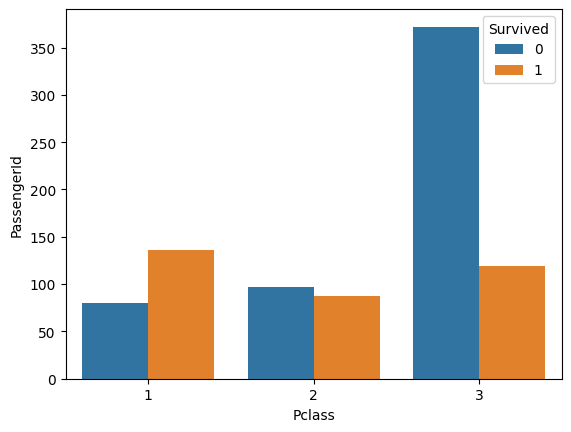

In [9]:
sns.barplot(data=tc_pclass, x='Pclass', y='PassengerId', hue='Survived')

In [10]:
tc_train.groupby('Sex')['PassengerId'].count()

Sex
female    314
male      577
Name: PassengerId, dtype: int64

In [11]:
tc_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

C:\Users\nadys\AppData\Local\Temp\ipykernel_6076\785375059.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tc_age = tc_train.groupby(['Age_range', 'Survived'])['PassengerId'].count().reset_index()


<Axes: xlabel='Age_range', ylabel='PassengerId'>

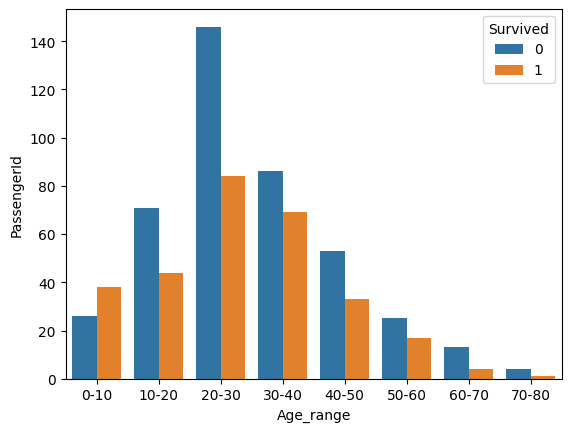

In [12]:
tc_train['Age_range'] = pd.cut(tc_train['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

tc_age = tc_train.groupby(['Age_range', 'Survived'])['PassengerId'].count().reset_index()

sns.barplot(data=tc_age, x='Age_range', y='PassengerId', hue='Survived')

C:\Users\nadys\AppData\Local\Temp\ipykernel_6076\3987857513.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tc_sibsp = tc_train.groupby(['SibSp_range', 'Survived'])['PassengerId'].count().reset_index()


<Axes: xlabel='SibSp_range', ylabel='PassengerId'>

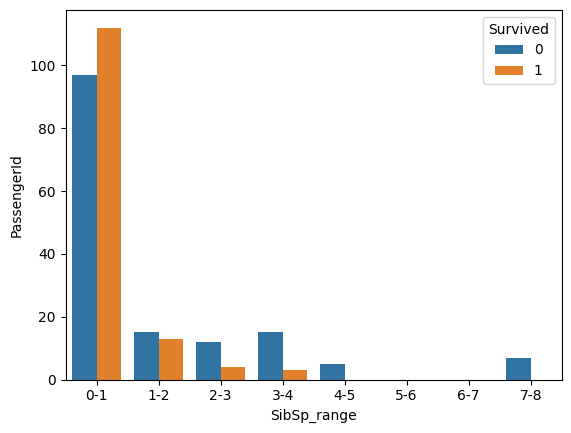

In [13]:
tc_train['SibSp_range'] = pd.cut(tc_train['SibSp'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8], labels=['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8'])

tc_sibsp = tc_train.groupby(['SibSp_range', 'Survived'])['PassengerId'].count().reset_index()

sns.barplot(data=tc_sibsp, x='SibSp_range', y='PassengerId', hue='Survived')

In [14]:
tc_train['Family'] = tc_train['Parch'] + tc_train['SibSp']

In [15]:
tc_train['Is_Alone'] = tc_train['Family'] == 0

C:\Users\nadys\AppData\Local\Temp\ipykernel_6076\3665944962.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tc_fare = tc_train.groupby(['Fare_range', 'Survived'])['PassengerId'].count().reset_index()


<Axes: xlabel='Fare_range', ylabel='PassengerId'>

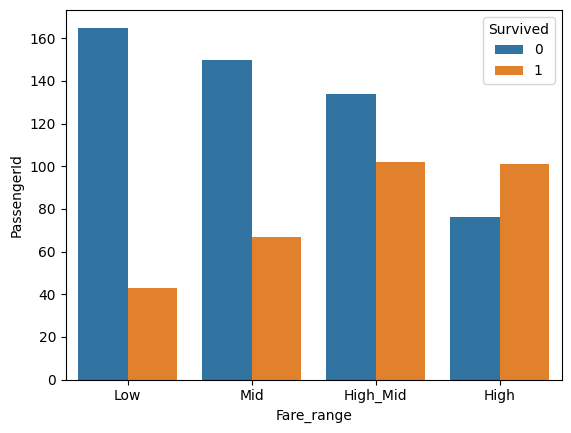

In [16]:
tc_train['Fare_range'] = pd.cut(tc_train['Fare'], bins=[0, 7.90, 14.45, 31.28, 120], labels=['Low', 'Mid', 'High_Mid', 'High'])

tc_fare = tc_train.groupby(['Fare_range', 'Survived'])['PassengerId'].count().reset_index()

sns.barplot(data=tc_fare, x='Fare_range', y='PassengerId', hue='Survived')

<Axes: xlabel='Embarked', ylabel='PassengerId'>

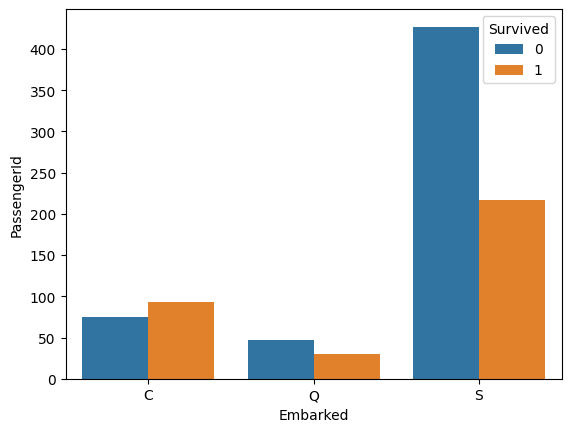

In [17]:
tc_embarked = tc_train.groupby(['Embarked', 'Survived'])['PassengerId'].count().reset_index()

sns.barplot(data=tc_embarked, x='Embarked', y='PassengerId', hue='Survived')

In [18]:
tc_train = tc_train.drop(columns=['Age_range', 'Fare_range', 'SibSp_range'])

**Filling in missing data**

In [20]:
tc_train['Embarked'].fillna(tc_train['Embarked'].mode()[0], inplace=True)

C:\Users\nadys\AppData\Local\Temp\ipykernel_6076\1335831857.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tc_train['Embarked'].fillna(tc_train['Embarked'].mode()[0], inplace=True)


In [21]:
del tc_train['Cabin']

In [22]:
tc_train['Salutation'] = tc_train['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

tc_train['Salutation'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Salutation, dtype: object

In [23]:
grp = tc_train.groupby(['Sex', 'Pclass'])

In [24]:
grp['Age'].apply(lambda x: x.fillna(x.median()))
tc_train['Age'].fillna(tc_train['Age'].median(), inplace=True)

C:\Users\nadys\AppData\Local\Temp\ipykernel_6076\753846732.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tc_train['Age'].fillna(tc_train['Age'].median(), inplace=True)


**Removing unnecessary variables**

In [25]:
tc_train = tc_train.drop(columns=['Name', 'Salutation', 'Ticket', 'SibSp', 'Parch', 'Is_Alone', 'PassengerId'])
tc_train.head().T

,0,1,2,3,4
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
Fare,7.25,71.2833,7.925,53.1,8.05
Embarked,S,C,S,S,S
Family,1,1,0,1,0


**Feature engineering**

In [26]:
gender_columns = pd.get_dummies(tc_train['Sex'], prefix='Sex').astype(int)
embarked_columns = pd.get_dummies(tc_train['Embarked'], prefix='Embarked').astype(int)
pclass_columns = pd.get_dummies(tc_train['Pclass'], prefix='Pclass').astype(int)

tc_train = tc_train.drop(columns=['Sex', 'Embarked', 'Pclass'])

tc_prep = pd.concat([tc_train, gender_columns, embarked_columns, pclass_columns], axis=1)
tc_prep.head()

,Survived,Age,Fare,Family,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,7.2500,1,0,1,0,0,1,0,0,1
1,1,38.0,71.2833,1,1,0,1,0,0,1,0,0
2,1,26.0,7.9250,0,1,0,0,0,1,0,0,1
3,1,35.0,53.1000,1,1,0,0,0,1,1,0,0
4,0,35.0,8.0500,0,0,1,0,0,1,0,0,1


In [27]:
categorized_age = pd.cut(tc_prep['Age'], bins = [0, 10, 20, 30, 40, 50, 60, 70, 80])

tc_prep['Categorized_age'] = categorized_age
del tc_prep['Age']

In [28]:
age_columns = pd.get_dummies(tc_prep['Categorized_age'], prefix='Age').astype(int)
tc_prep = pd.concat([tc_prep, age_columns], axis=1)
del tc_prep['Categorized_age']
tc_prep.head().T

,0,1,2,3,4
Survived,0.00,1.0000,1.000,1.0,0.00
Fare,7.25,71.2833,7.925,53.1,8.05
Family,1.00,1.0000,0.000,1.0,0.00
Sex_female,0.00,1.0000,1.000,1.0,0.00
Sex_male,1.00,0.0000,0.000,0.0,1.00
Embarked_C,0.00,1.0000,0.000,0.0,0.00
Embarked_Q,0.00,0.0000,0.000,0.0,0.00
Embarked_S,1.00,0.0000,1.000,1.0,1.00
Pclass_1,0.00,1.0000,0.000,1.0,0.00
Pclass_2,0.00,0.0000,0.000,0.0,0.00


In [29]:
scaler = StandardScaler()
tc_prep['Fare'] = scaler.fit_transform(tc_prep['Fare'].to_numpy().reshape(-1, 1))

In [30]:
tc_prep.head().T

,0,1,2,3,4
Survived,0.000000,1.000000,1.000000,1.00000,0.000000
Fare,-0.502445,0.786845,-0.488854,0.42073,-0.486337
Family,1.000000,1.000000,0.000000,1.00000,0.000000
Sex_female,0.000000,1.000000,1.000000,1.00000,0.000000
Sex_male,1.000000,0.000000,0.000000,0.00000,1.000000
Embarked_C,0.000000,1.000000,0.000000,0.00000,0.000000
Embarked_Q,0.000000,0.000000,0.000000,0.00000,0.000000
Embarked_S,1.000000,0.000000,1.000000,1.00000,1.000000
Pclass_1,0.000000,1.000000,0.000000,1.00000,0.000000
Pclass_2,0.000000,0.000000,0.000000,0.00000,0.000000


In [31]:
tc_prep.to_csv('tc.csv', index=False)